 # MIVA-DTS305_Question1_Solution.ipynb

# 
# MIVA-DTS 305 - Data Quality and Data Wrangling
## Question 1: Cleaning and Analysing Tabular Data
# 
# **Name:**  |**Matric Number:** 
## Your Name | Your Matric Number
## Your Name | Your Matric Number
## Your Name | [Your Matric Number
## Your Name | Your Matric Number
## Your Name | Your Matric Number
## Your Name | Your Matric Number


# **Date:** 5 Dec, 2025
 

### Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### Step 2: Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('customer_orders_raw.csv')

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          1000 non-null   object 
 1   Customer Name     1000 non-null   object 
 2   Order Date        1000 non-null   object 
 3   Product Category  1000 non-null   object 
 4   Quantity          1000 non-null   int64  
 5   Price             1000 non-null   float64
 6   Total Amount      900 non-null    float64
 7   Country           1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB
None

First 5 rows:
   Order ID  Customer Name  Order Date Product Category  Quantity   Price  \
0  ORD10000  Sarah Johnson  2025-11-09           Sports         4  119.37   
1  ORD10001  Sarah Johnson  2024-04-09             Food         1   24.60   
2  ORD10002      Lisa Wang  2024-02-08             Food         4  230.11   
3  ORD10003     Mike

 ### Step 3: Handle Missing Values

In [3]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Order ID              0
Customer Name         0
Order Date            0
Product Category      0
Quantity              0
Price                 0
Total Amount        100
Country               0
dtype: int64


In [4]:
# First, let's verify our logic by checking a sample
print("Sample rows with missing Total Amount:")
sample_missing = df[df['Total Amount'].isna()].head()
print(sample_missing[['Order ID', 'Quantity', 'Price', 'Total Amount']])

# Calculate missing values
mask_missing = df['Total Amount'].isna()
calculated_total = df.loc[mask_missing, 'Quantity'] * df.loc[mask_missing, 'Price']

print(f"\nNumber of missing Total Amount values: {mask_missing.sum()}")
print(f"Calculated values for missing entries (first 5):")
print(calculated_total.head())

Sample rows with missing Total Amount:
    Order ID  Quantity   Price  Total Amount
9   ORD10009         1  122.23           NaN
12  ORD10012         3  259.67           NaN
15  ORD10015         7   87.50           NaN
22  ORD10022         4   41.37           NaN
31  ORD10031         5  116.67           NaN

Number of missing Total Amount values: 100
Calculated values for missing entries (first 5):
9     122.23
12    779.01
15    612.50
22    165.48
31    583.35
dtype: float64


### Step 4: Remove Duplicate Rows

In [5]:
# Identify and remove duplicates
duplicates_before = df.duplicated().sum()
print(f"Number of duplicate rows before cleaning: {duplicates_before}")

df_cleaned = df.drop_duplicates()

duplicates_after = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows after cleaning: {duplicates_after}")
print(f"Removed {duplicates_before - duplicates_after} duplicate rows")

Number of duplicate rows before cleaning: 41
Number of duplicate rows after cleaning: 0
Removed 41 duplicate rows


# ### Step 5: Standardize Country Column Formatting

In [6]:
# Define a function to standardize country names
def standardize_country(country):
    country_lower = str(country).lower().strip()
    
    # USA variations
    if country_lower in ['usa', 'u.s.a.', 'united states', 'us']:
        return 'United States'
    # Nigeria variations
    elif country_lower in ['nigeria', 'ng']:
        return 'Nigeria'
    # UK variations
    elif country_lower in ['uk', 'united kingdom', 'u.k.', 'britain', 'UK', 'U.K']:
        return 'United Kingdom'
    # UAE/Dubai variations
    elif country_lower in ['uae', 'dubai', 'Dubai', 'united arab emirates', 'UAE']:
        return 'United Arab Emirates'
    else:
        return 'Other'

# Apply standardization
df_cleaned = df.copy()  # Create explicit copy
df_cleaned['Country_Standardized'] = df_cleaned['Country'].apply(standardize_country)

print("Country standardization completed:")
print("Original unique values:", df_cleaned['Country'].unique()[:10])
print("Standardized unique values:", df_cleaned['Country_Standardized'].unique())

# Display distribution
country_dist = df_cleaned['Country_Standardized'].value_counts()
print("\nStandardized Country Distribution:")
print(country_dist)

Country standardization completed:
Original unique values: ['Dubai' 'U.K.' 'usa' 'nigeria' 'dubai' 'U.S.A.' 'NG' 'UK' 'UAE' 'Nigeria']
Standardized unique values: ['United Arab Emirates' 'United Kingdom' 'United States' 'Nigeria']

Standardized Country Distribution:
Country_Standardized
United Arab Emirates    260
United States           257
United Kingdom          246
Nigeria                 237
Name: count, dtype: int64


### Step 6: Data Type Corrections

In [7]:
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])

# Ensure numeric columns are proper types
df_cleaned['Quantity'] = pd.to_numeric(df_cleaned['Quantity'], errors='coerce')
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')
df_cleaned['Total Amount'] = pd.to_numeric(df_cleaned['Total Amount'], errors='coerce')

print("Data types after conversion:")
print(df_cleaned.dtypes)

Data types after conversion:
Order ID                        object
Customer Name                   object
Order Date              datetime64[ns]
Product Category                object
Quantity                         int64
Price                          float64
Total Amount                   float64
Country                         object
Country_Standardized            object
dtype: object


### Step 7: Aggregate Total Revenue by Product Category

Total Revenue by Product Category:
Product Category
Home & Garden    193265.86
Beauty           177874.40
Books            170571.24
Electronics      167849.16
Sports           159523.34
Food             156153.93
Toys             143157.85
Clothing         132591.98
Name: Total Amount, dtype: float64


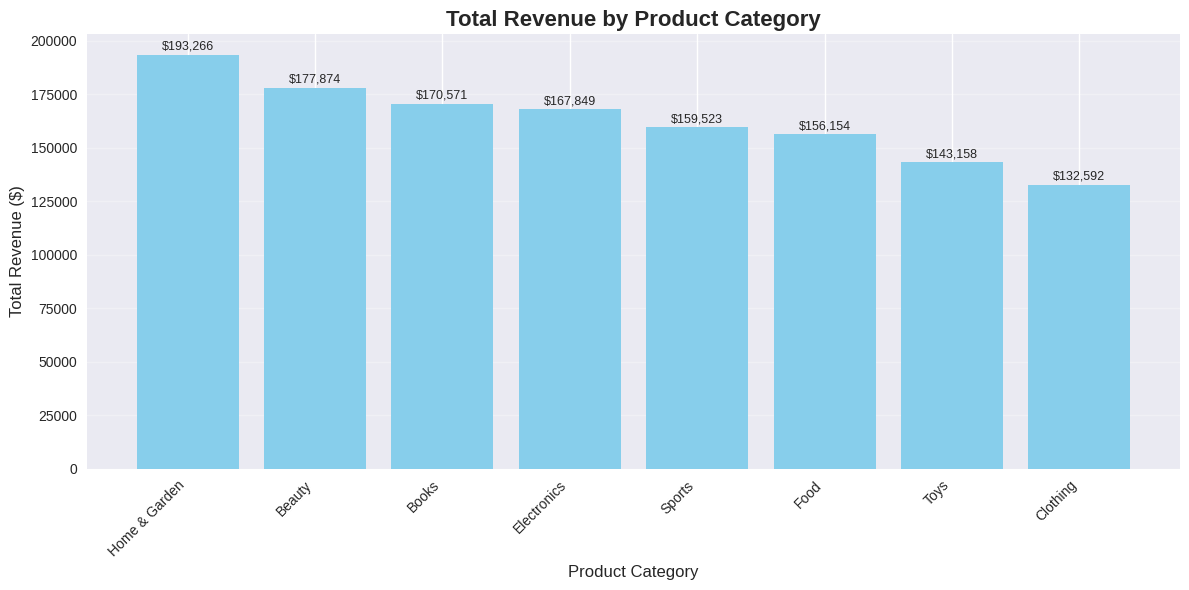

In [8]:
# Calculate revenue by product category
revenue_by_category = df_cleaned.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

print("Total Revenue by Product Category:")
print(revenue_by_category)

# Visualization 1: Bar chart of revenue by category
plt.figure(figsize=(12, 6))
bars = plt.bar(revenue_by_category.index, revenue_by_category.values, color='skyblue')
plt.title('Total Revenue by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('revenue_by_category.png', dpi=300, bbox_inches='tight')
plt.show()


### Step 8: Identify Top 3 Countries by Total Revenue

Total Revenue by Country:
Country_Standardized
United States           336376.87
United Kingdom          328897.89
Nigeria                 323612.10
United Arab Emirates    312100.90
Name: Total Amount, dtype: float64

Top 3 Countries by Revenue:
Country_Standardized
United States     336376.87
United Kingdom    328897.89
Nigeria           323612.10
Name: Total Amount, dtype: float64


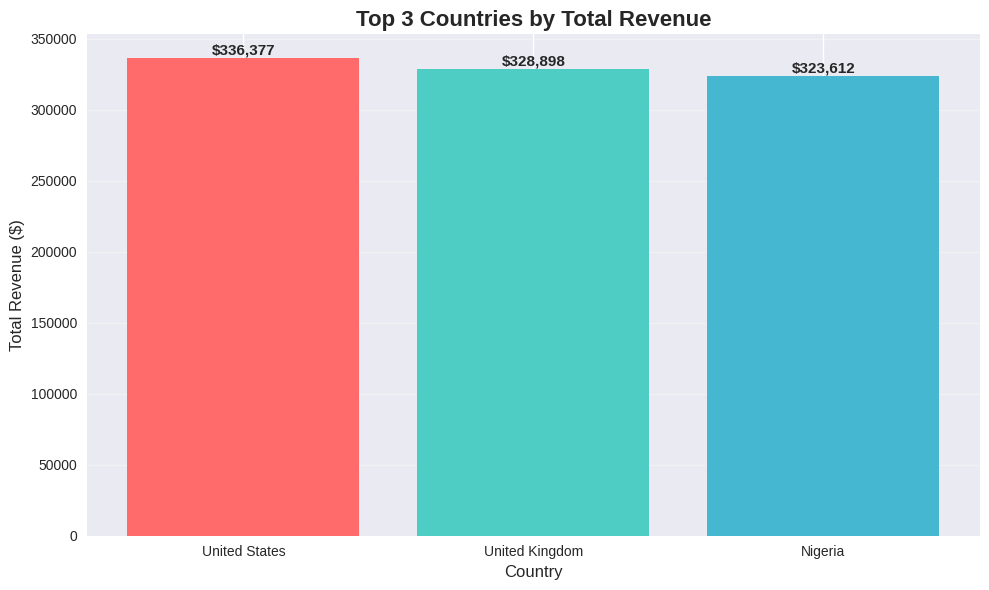

In [9]:
# Calculate revenue by standardized country
revenue_by_country = df_cleaned.groupby('Country_Standardized')['Total Amount'].sum().sort_values(ascending=False)

print("Total Revenue by Country:")
print(revenue_by_country)

# Get top 3 countries
top_3_countries = revenue_by_country.head(3)
print("\nTop 3 Countries by Revenue:")
print(top_3_countries)

# Visualization 2: Top 3 countries by revenue
plt.figure(figsize=(10, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = plt.bar(top_3_countries.index, top_3_countries.values, color=colors)

plt.title('Top 3 Countries by Total Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 500,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('top_3_countries_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

### Step 9: Save Cleaned Dataset

In [10]:
df_cleaned.to_csv('customer_orders_cleaned.csv', index=False)
print("Cleaned dataset saved as: customer_orders_cleaned.csv")

# Summary statistics
print("\n=== CLEANING SUMMARY ===")
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")
print(f"Missing values handled: {df['Total Amount'].isna().sum()} values")
print(f"Duplicates removed: {duplicates_before - duplicates_after} rows")
print(f"Countries standardized: {len(df['Country'].unique())} → {len(df_cleaned['Country_Standardized'].unique())}")
print(f"Total revenue calculated: ${df_cleaned['Total Amount'].sum():,.2f}")

Cleaned dataset saved as: customer_orders_cleaned.csv

=== CLEANING SUMMARY ===
Original dataset shape: (1000, 8)
Cleaned dataset shape: (1000, 9)
Missing values handled: 100 values
Duplicates removed: 41 rows
Countries standardized: 12 → 4
Total revenue calculated: $1,300,987.76
